In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import scanpy as sc
import seaborn as sns
import anndata as ad
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
#sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
name_anndata = "D2-1/anndataNucD21"
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata) # get original anndata after Sparrow
# anndata = sdata.table
# delete anndata
# del sdata.table
# create anndata
# sdata.table = anndata

In [3]:
anndata.obs.columns

Index(['region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes',
       'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize', 'leiden',
       'portal_vein_EC45', 'LSEC45', 'LSEC Portal', 'LSEC Central',
       'central_vein_EC45', 'stellateAll', 'stellate PeriPortal',
       'stellate PeriCentral', 'FibroblastAll', 'fibroblastPortal',
       'FibroblastsCentral', 'VSMC', 'capsular_fibroblasts45',
       'Mesothelial cells', 'Hepatocytes', 'HepatocytesPortal',
       'HepatocytesCentral', 'Cholangiocytes', 'cDC2s', 'Mig. cDCs',
       'Neutrophils', 'Basophils', 'NK cells', 'ILC1s', 'T cells', 'pDCs',
       'B cells', 'cDC1s', 'Kupffer cells', 'Capsule and Central Vein Mac',
       'Portal LAM macrophages', 'Monocytes', 'LECs', 'Cleanliness',
       'annotation', 'Hep', 'annotationSave'],
      dtype='object')

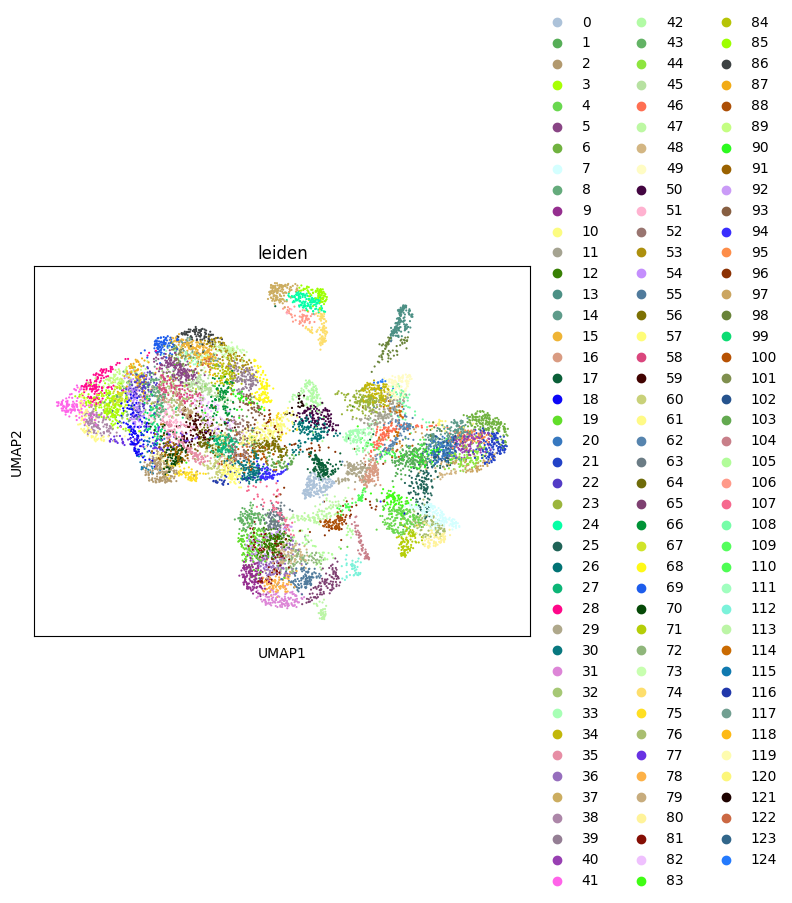

In [4]:
# Make UMAP
n_pca = np.count_nonzero(anndata.uns['pca']['variance_ratio'] > 0.01)
make_umap(anndata,n_PCAs=n_pca,n_neighbors=15)
# Leiden Overclustering
sc.tl.leiden(anndata,resolution=10,key_added='leiden')
sc.pl.umap(anndata,color='leiden',palette=list(matplotlib.colors.XKCD_COLORS.values()))

Hepa            55.515616
Kupf            11.877946
LSEC            11.662273
Stel             6.486141
Oth im           3.985941
Chol             2.292515
Fibr             2.244588
B cell           2.164710
Portal vein      1.573608
Portal LAM       1.317997
Central vein     0.639029
Meso             0.159757
Unknown          0.079879
Name: annotation_own_score_genes_BasicMartin, dtype: float64


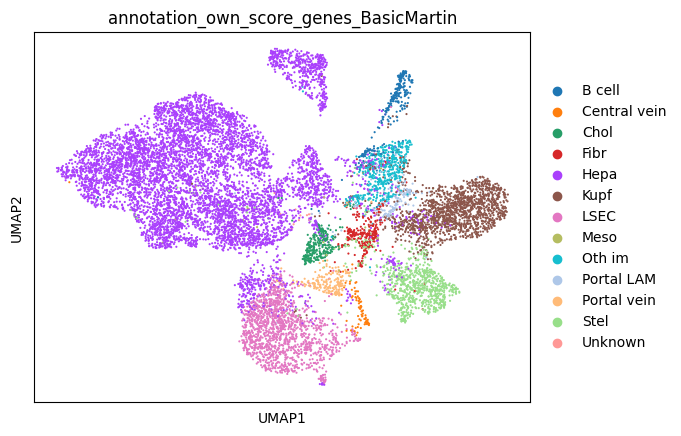

Percentage of cells with changed annotation: 4.56


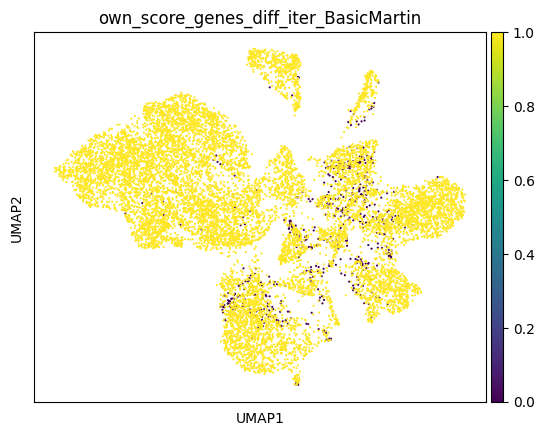

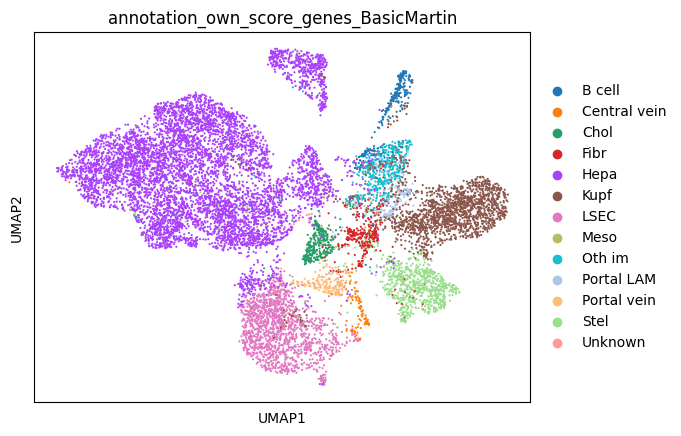

Hepa            53.127247
Kupf            13.411614
LSEC            11.989776
Stel             6.358335
Oth im           3.562585
Fibr             2.723860
Chol             2.460260
B cell           2.300503
Portal vein      1.557632
Portal LAM       1.405863
Central vein     0.822749
Meso             0.199696
Unknown          0.079879
Name: annotation_own_score_genes_BasicMartin, dtype: float64
Percentage of cells with changed annotation: 0.88


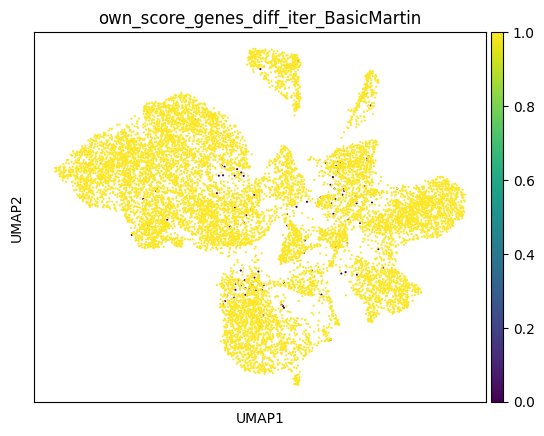

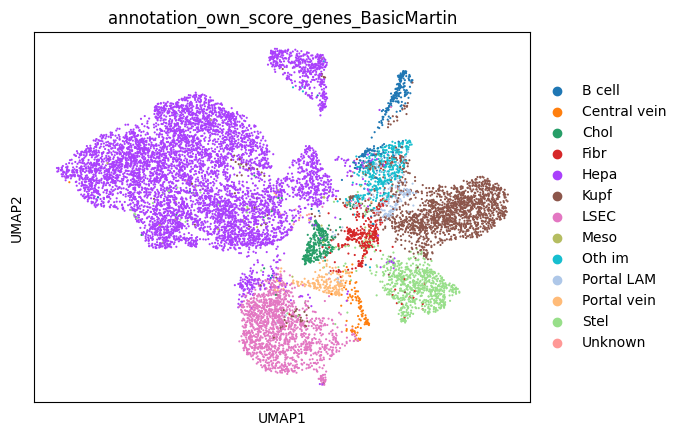

Hepa            52.616024
Kupf            13.731129
LSEC            12.077642
Stel             6.406262
Oth im           3.450755
Fibr             2.779775
Chol             2.460260
B cell           2.316479
Portal vein      1.589584
Portal LAM       1.437815
Central vein     0.838725
Meso             0.215672
Unknown          0.079879
Name: annotation_own_score_genes_BasicMartin, dtype: float64
Percentage of cells with changed annotation: 0.1


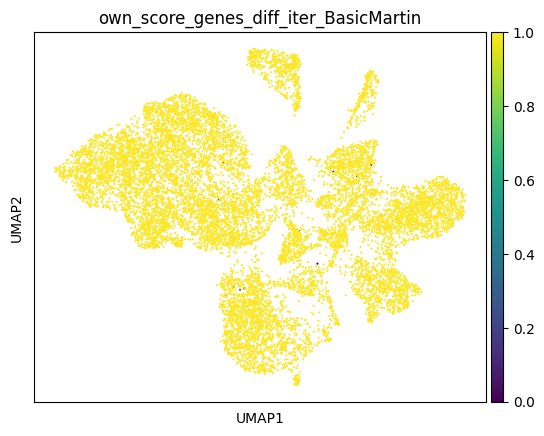

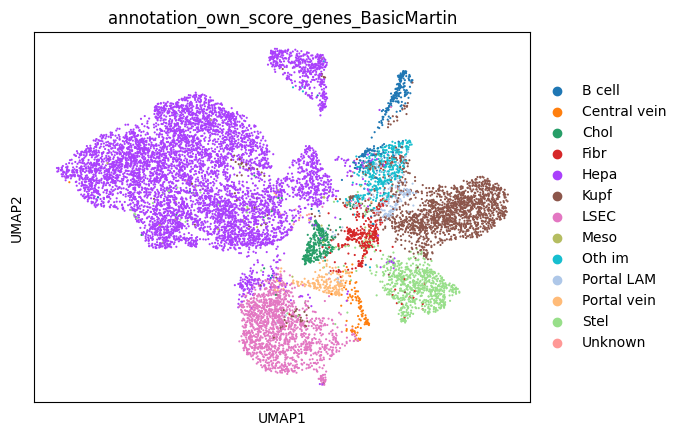

Hepa            52.560109
Kupf            13.755092
LSEC            12.117581
Stel             6.398275
Oth im           3.426791
Fibr             2.787763
Chol             2.452273
B cell           2.324467
Portal vein      1.589584
Portal LAM       1.453790
Central vein     0.838725
Meso             0.215672
Unknown          0.079879
Name: annotation_own_score_genes_BasicMartin, dtype: float64
Percentage of cells with changed annotation: 0.0
converged
Hepa            55.387811
Kupf            11.598370
LSEC            11.518492
Stel             5.839125
Oth im           3.914051
Fibr             2.891605
Chol             2.244588
B cell           2.156722
Portal vein      1.669462
Portal LAM       1.405863
Central vein     1.038422
Meso             0.183721
Unknown          0.151769
Name: annotation_own_score_genes_HLMartin, dtype: float64


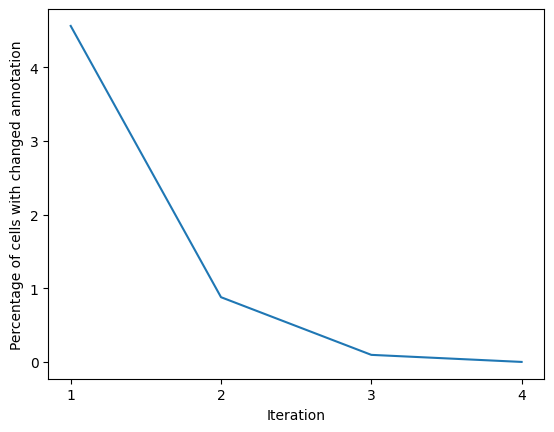

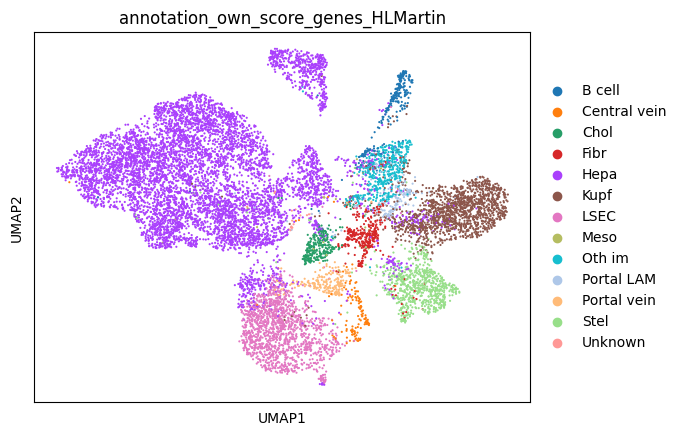

Percentage of cells with changed annotation: 5.3


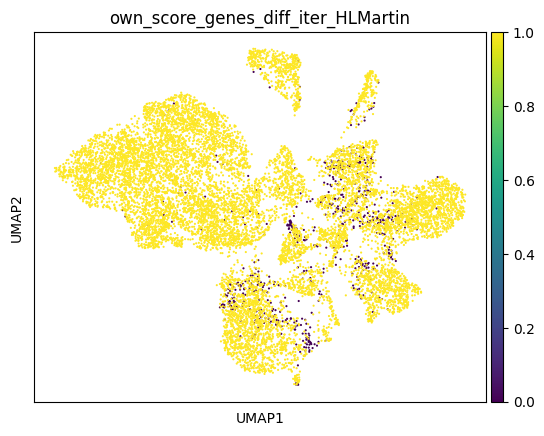

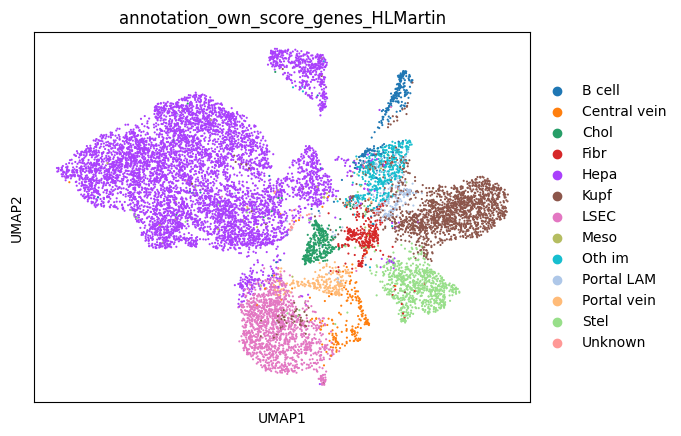

Hepa            52.384376
Kupf            13.259845
LSEC            11.342759
Stel             6.150651
Oth im           3.762281
Fibr             2.667945
Chol             2.620018
B cell           2.372394
Portal vein      1.765317
Portal LAM       1.629523
Central vein     1.581596
Meso             0.311526
Unknown          0.151769
Name: annotation_own_score_genes_HLMartin, dtype: float64
Percentage of cells with changed annotation: 0.6


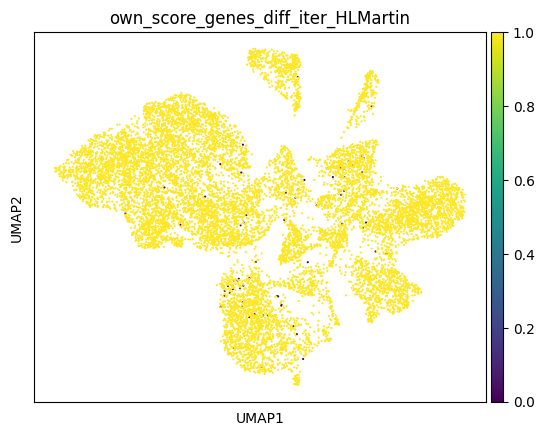

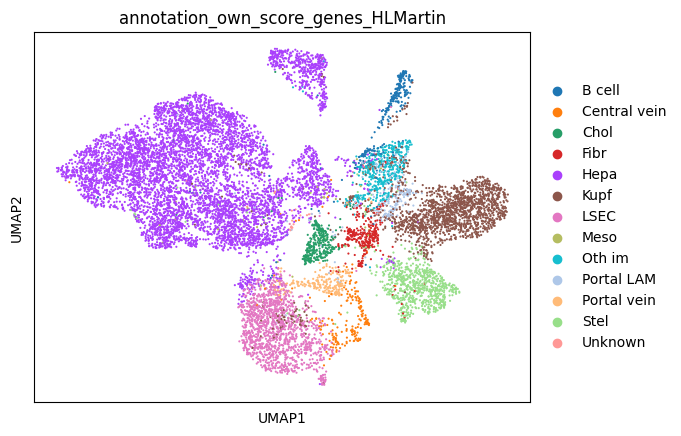

Hepa            52.080837
Kupf            13.523444
LSEC            11.334771
Stel             6.142663
Oth im           3.650451
Fibr             2.667945
Chol             2.628005
B cell           2.404345
Portal vein      1.757329
Portal LAM       1.701414
Central vein     1.613547
Meso             0.343478
Unknown          0.151769
Name: annotation_own_score_genes_HLMartin, dtype: float64
Percentage of cells with changed annotation: 0.14


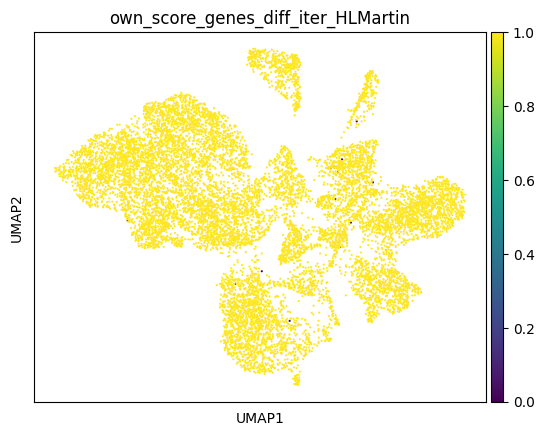

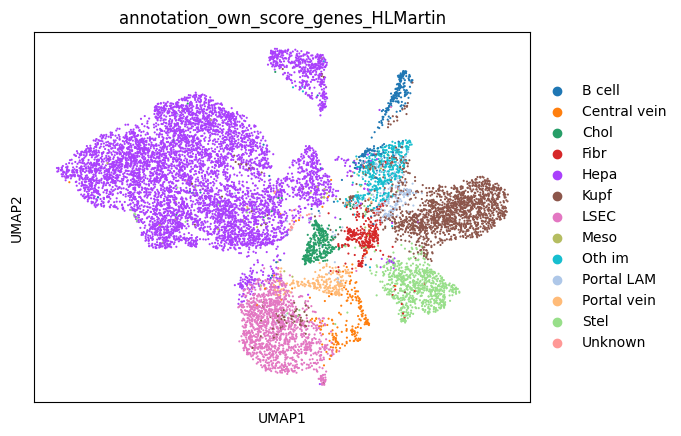

Hepa            52.048886
Kupf            13.579359
LSEC            11.318795
Stel             6.126687
Oth im           3.618500
Fibr             2.667945
Chol             2.628005
B cell           2.404345
Portal vein      1.757329
Portal LAM       1.725377
Central vein     1.621535
Meso             0.351466
Unknown          0.151769
Name: annotation_own_score_genes_HLMartin, dtype: float64
Percentage of cells with changed annotation: 0.05
converged
Kupf           24.442847
Stel           20.225258
LSEC           15.784008
Portal LAM     10.240435
Oth im          8.251458
Unknown         5.439732
Hepa            5.104242
Chol            5.000399
Fibr            2.132758
B cell          1.765317
Portal vein     1.397875
Meso            0.215672
Name: annotation_own_score_genes_Michiel, dtype: float64


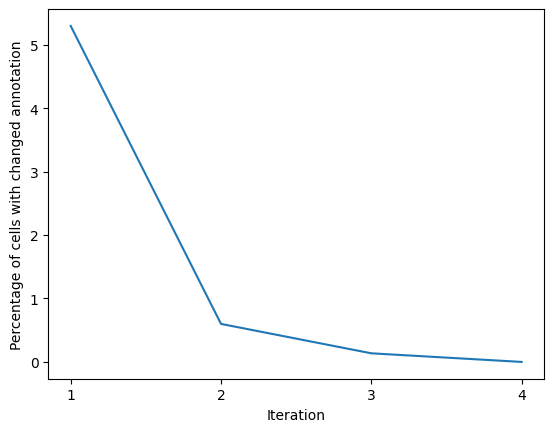

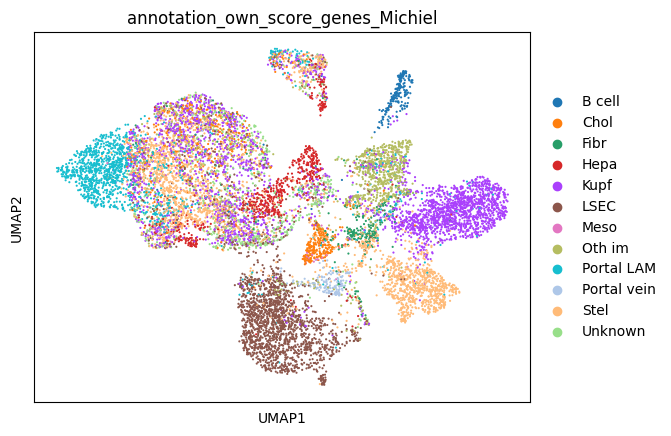

Percentage of cells with changed annotation: 7.55


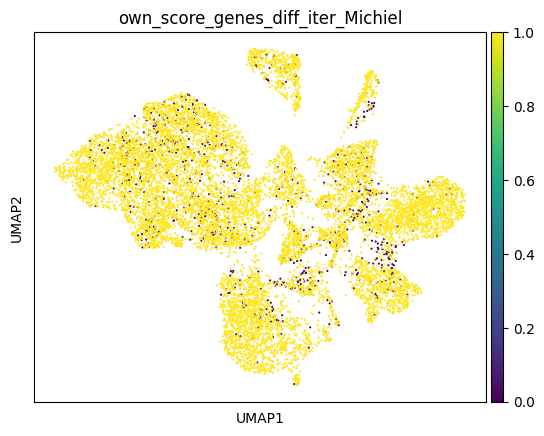

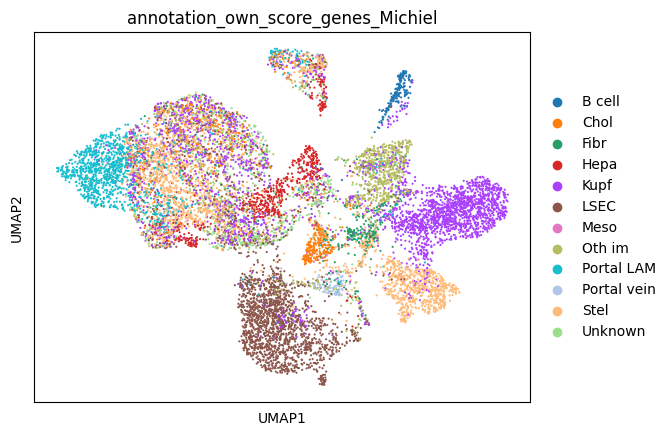

Kupf           24.442847
Stel           19.098970
LSEC           17.796949
Portal LAM      9.713236
Oth im          8.515057
Unknown         5.439732
Chol            4.904545
Hepa            4.904545
Fibr            2.588066
B cell          1.605560
Portal vein     0.862689
Meso            0.127806
Name: annotation_own_score_genes_Michiel, dtype: float64
Percentage of cells with changed annotation: 1.14


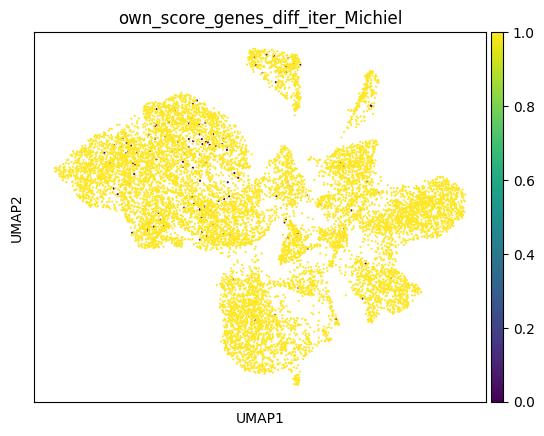

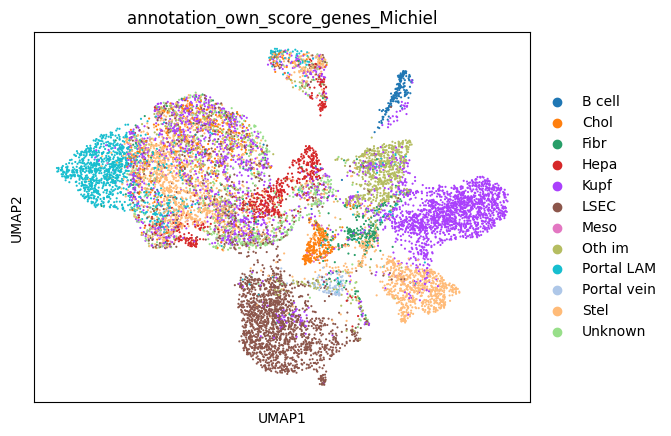

Kupf           24.962058
Stel           18.587747
LSEC           17.621216
Portal LAM      9.641345
Oth im          8.435179
Unknown         5.439732
Chol            5.184120
Hepa            4.904545
Fibr            2.667945
B cell          1.589584
Portal vein     0.838725
Meso            0.127806
Name: annotation_own_score_genes_Michiel, dtype: float64
Percentage of cells with changed annotation: 0.2


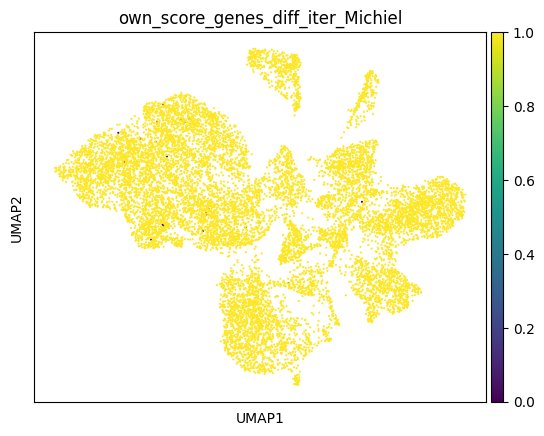

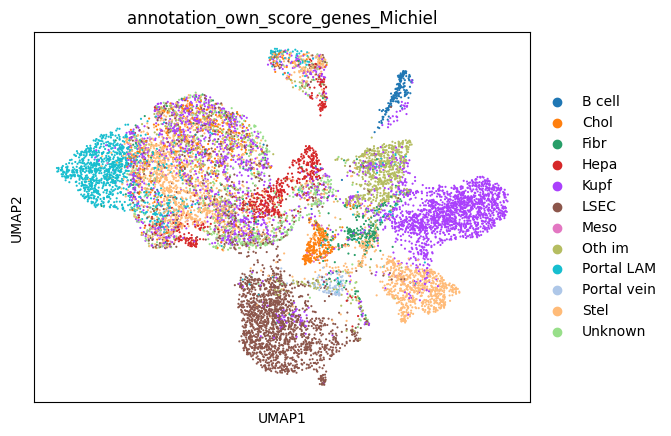

Kupf           25.105839
Stel           18.515856
LSEC           17.565301
Portal LAM      9.633357
Oth im          8.435179
Unknown         5.439732
Chol            5.192108
Hepa            4.904545
Fibr            2.667945
B cell          1.589584
Portal vein     0.830737
Meso            0.119818
Name: annotation_own_score_genes_Michiel, dtype: float64
Percentage of cells with changed annotation: 0.05
converged
Hepa            49.396917
Kupf            12.213436
LSEC            11.790079
Oth im           5.024363
Meso             4.329419
Portal LAM       3.362888
Fibr             2.939532
Stel             2.739835
Chol             2.635993
Portal vein      1.957025
B cell           1.677450
Central vein     1.174215
Unknown          0.758847
Name: annotation_own_score_genes_AtlasTop20, dtype: float64


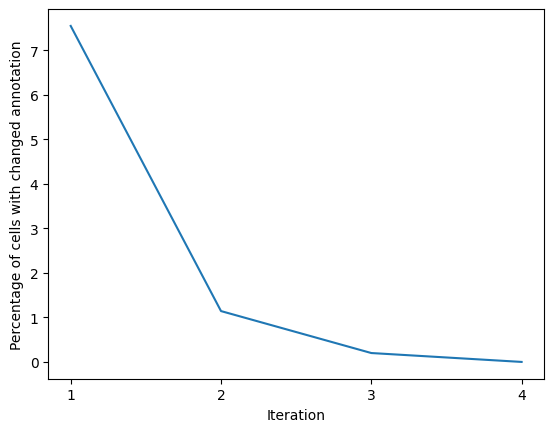

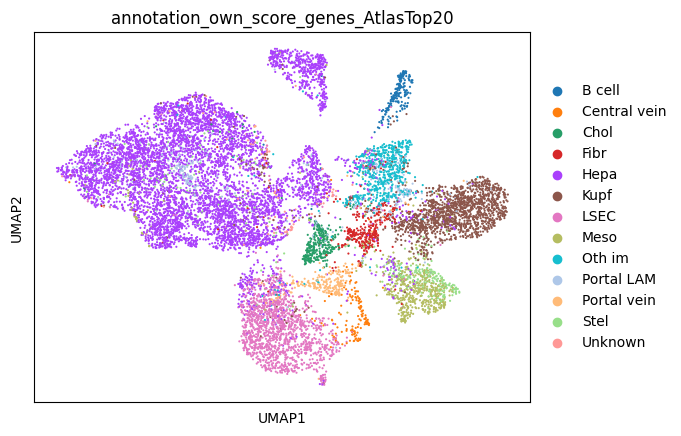

Percentage of cells with changed annotation: 10.54


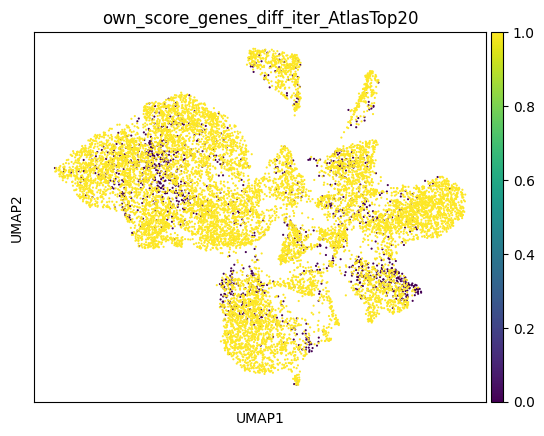

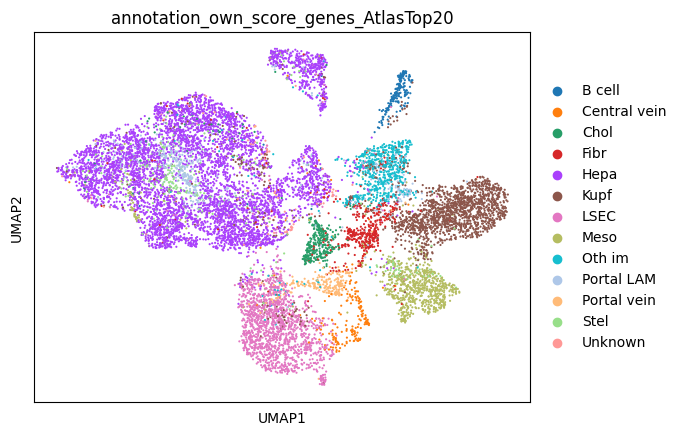

Hepa            42.535346
Kupf            13.803019
LSEC            12.365205
Meso             6.238517
Oth im           5.271987
Portal LAM       4.481189
Fibr             3.946002
Chol             2.915568
Stel             2.683920
Portal vein      1.845195
B cell           1.621535
Central vein     1.533669
Unknown          0.758847
Name: annotation_own_score_genes_AtlasTop20, dtype: float64
Percentage of cells with changed annotation: 2.84


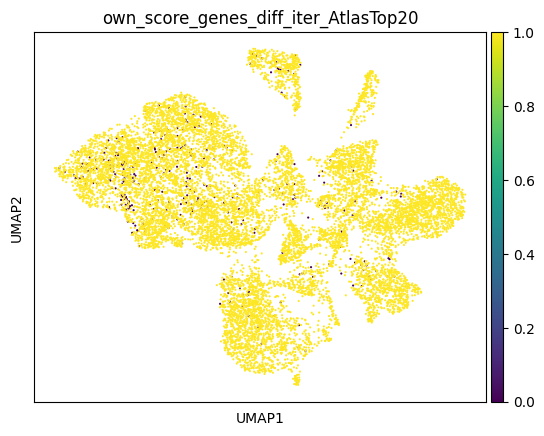

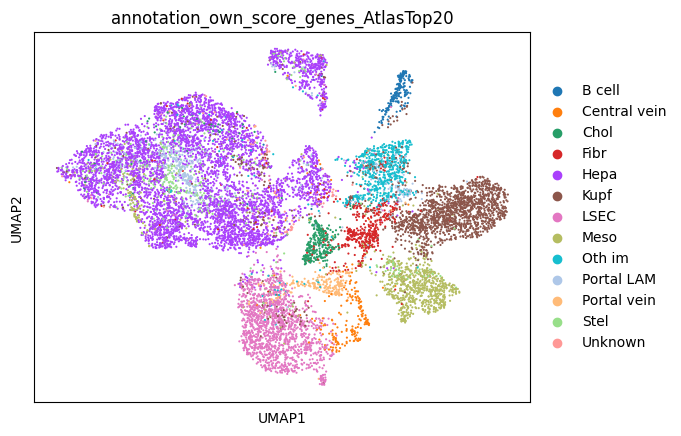

Hepa            40.322709
Kupf            14.058631
LSEC            12.221423
Meso             7.061267
Oth im           5.295950
Portal LAM       4.800703
Fibr             4.161674
Stel             3.378864
Chol             2.963495
Portal vein      1.797268
B cell           1.605560
Central vein     1.573608
Unknown          0.758847
Name: annotation_own_score_genes_AtlasTop20, dtype: float64
Percentage of cells with changed annotation: 0.69


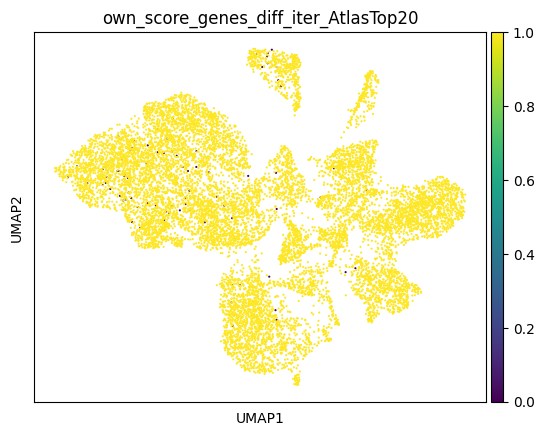

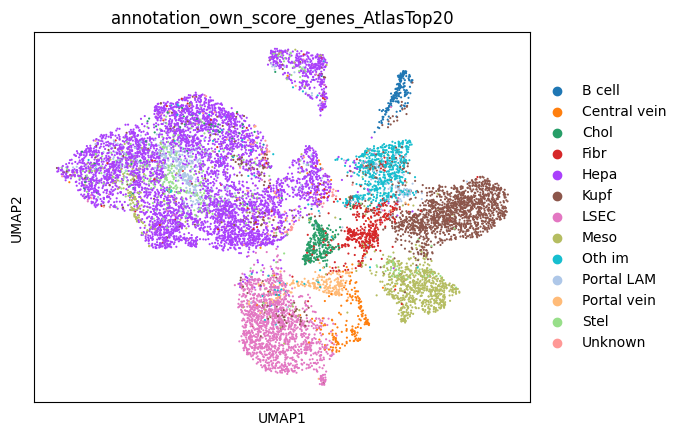

Hepa            39.755572
Kupf            14.090582
LSEC            12.181484
Meso             7.300903
Oth im           5.295950
Portal LAM       4.896557
Fibr             4.177650
Stel             3.610512
Chol             2.963495
Portal vein      1.789280
B cell           1.605560
Central vein     1.573608
Unknown          0.758847
Name: annotation_own_score_genes_AtlasTop20, dtype: float64
Percentage of cells with changed annotation: 0.14


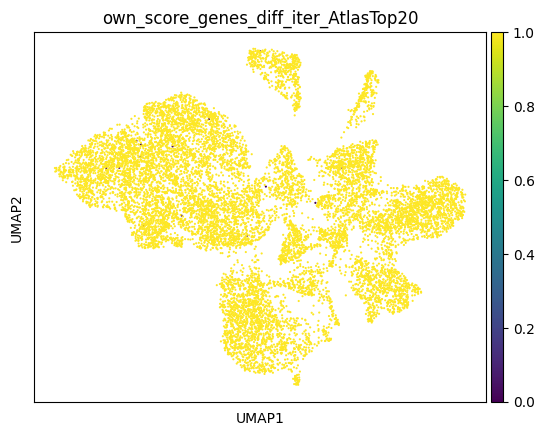

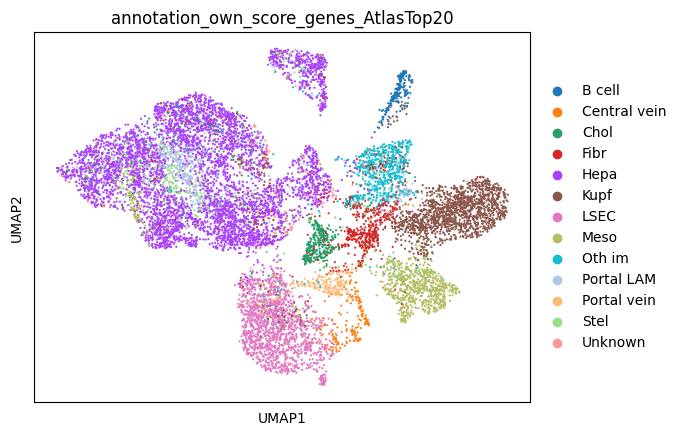

Hepa            39.651729
Kupf            14.082594
LSEC            12.181484
Meso             7.340842
Oth im           5.295950
Portal LAM       4.912533
Fibr             4.209601
Stel             3.642463
Chol             2.955508
Portal vein      1.789280
B cell           1.605560
Central vein     1.573608
Unknown          0.758847
Name: annotation_own_score_genes_AtlasTop20, dtype: float64
Percentage of cells with changed annotation: 0.03
converged


Hepa      LSEC  Portal vein  Central vein       Chol      Kupf  \
0           NaN  2.883668    -0.668599     -0.893323        NaN -1.051031   
1           NaN       NaN          NaN           NaN        NaN       NaN   
2      0.270364       NaN          NaN           NaN        NaN       NaN   
3      0.145268       NaN          NaN           NaN        NaN  4.654108   
4           NaN -0.341657    -2.087260     -2.311984        NaN       NaN   
...         ...       ...          ...           ...        ...       ...   
12514  1.795886       NaN          NaN           NaN        NaN -0.990211   
12515  1.369535 -1.124640    -2.072755     -2.297479        NaN       NaN   
12516  2.787153  3.538989    -1.750426     -1.975150        NaN       NaN   
12517  0.042391       NaN          NaN           NaN  15.436038       NaN   
12518  0.303913  1.924203    -1.418205     -1.642930        NaN  8.058931   

           Stel      Fibr  B cell      Meso  Portal LAM    Oth im  
0      1.423372       NaN     NaN -0.165384         NaN  0.240960  
1           NaN       NaN     NaN       NaN         NaN       NaN  
2           NaN       NaN     NaN       NaN         NaN       NaN  
3           NaN       NaN     NaN       NaN         NaN       NaN  
4      0.667738 -2.001502     NaN       NaN         NaN       NaN  
...         ...       ...     ...       ...         ...       ...  
12514       NaN       NaN     NaN       NaN    1.045348       NaN  
12515 -0.609435       NaN     NaN       NaN         NaN       NaN  
12516       NaN       NaN     NaN       NaN    3.203078       NaN  
12517       NaN       NaN     NaN       NaN    7.406559  0.604296  
12518       NaN       NaN     NaN       NaN         NaN       NaN  

[12519 rows x 12 columns]

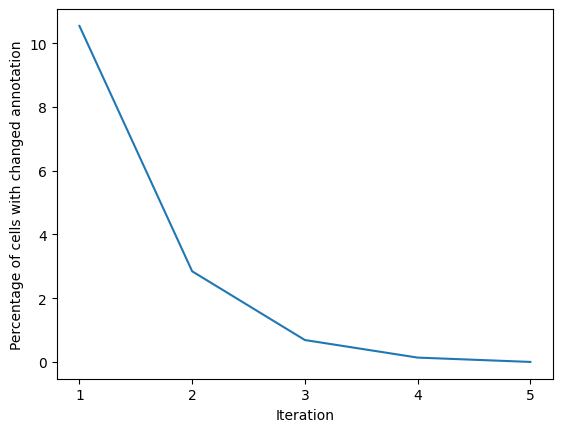

In [5]:
### Basic markers Martin
path_mg_BasicMartin = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/BasicMartin.csv"
mg_dict, scoresper_cluster = score_genes_bins(anndata,path_marker_genes = path_mg_BasicMartin,bins = 25,suffix ='_BasicMartin')
#visualize_classification(anndata,'score_genes_original_BasicMartin','umap_15',path_mg_BasicMartin,plot_dot_plot=False,plot_rank_genes_groups=False)
own_score_genes_iterative(anndata,path_mg_BasicMartin,nr_iterations=8,output_dir=OUTPUT_DIR,suffix='_BasicMartin')
#visualize_classification(anndata,'own_score_genes_start_iterative_BasicMartin','umap_15',path_mg_BasicMartin,plot_dot_plot=False,plot_rank_genes_groups=False)
#visualize_classification(anndata,'own_score_genes_BasicMartin','umap_15',path_mg_BasicMartin,plot_dot_plot=False,plot_rank_genes_groups=False)

### HL markers Martin
path_mg_HLMartin = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/HLMartin.csv"
mg_dict, scoresper_cluster = score_genes_bins(anndata,path_marker_genes = path_mg_HLMartin,bins = 25,suffix ='_HLMartin')
#visualize_classification(anndata,'score_genes_original_HLMartin','umap_15',path_mg_HLMartin,plot_dot_plot=False,plot_rank_genes_groups=False)
own_score_genes_iterative(anndata,path_mg_HLMartin,nr_iterations=8,output_dir=OUTPUT_DIR,suffix='_HLMartin')
#visualize_classification(anndata,'own_score_genes_start_iterative_HLMartin','umap_15',path_mg_HLMartin,plot_dot_plot=False,plot_rank_genes_groups=False)
#visualize_classification(anndata,'own_score_genes_HLMartin','umap_15',path_mg_HLMartin,plot_dot_plot=False,plot_rank_genes_groups=False)



In [6]:
anndata.obs.columns

Index(['region', 'instance', 'n_genes_by_counts', 'log1p_n_genes_by_counts',
       'total_counts', 'log1p_total_counts', 'pct_counts_in_top_2_genes',
       'pct_counts_in_top_5_genes', 'n_counts', 'shapeSize', 'leiden',
       'portal_vein_EC45', 'LSEC45', 'LSEC Portal', 'LSEC Central',
       'central_vein_EC45', 'stellateAll', 'stellate PeriPortal',
       'stellate PeriCentral', 'FibroblastAll', 'fibroblastPortal',
       'FibroblastsCentral', 'VSMC', 'capsular_fibroblasts45',
       'Mesothelial cells', 'Hepatocytes', 'HepatocytesPortal',
       'HepatocytesCentral', 'Cholangiocytes', 'cDC2s', 'Mig. cDCs',
       'Neutrophils', 'Basophils', 'NK cells', 'ILC1s', 'T cells', 'pDCs',
       'B cells', 'cDC1s', 'Kupffer cells', 'Capsule and Central Vein Mac',
       'Portal LAM macrophages', 'Monocytes', 'LECs',
       'cleanliness_score_genes_original_BasicMartin',
       'annotation_score_genes_original_BasicMartin', 'annotationSave', 'Hep',
       'score_celltype_own_score_genes_Ba

In [7]:
anndata.uns.keys()

dict_keys(['annotation_colors', 'annotation_nhood_enrichment', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'spatial_neighbors', 'spatialdata_attrs', 'umap', 'umap_15', 'score_genes_original_BasicMartin', 'own_score_genes_BasicMartin', 'annotation_own_score_genes_BasicMartin_colors', 'own_score_genes_start_iterative_BasicMartin', 'score_genes_original_HLMartin', 'own_score_genes_HLMartin', 'annotation_own_score_genes_HLMartin_colors', 'own_score_genes_start_iterative_HLMartin', 'score_genes_original_Michiel', 'own_score_genes_Michiel', 'annotation_own_score_genes_Michiel_colors', 'own_score_genes_start_iterative_Michiel', 'score_genes_original_AtlasTop20', 'own_score_genes_AtlasTop20', 'annotation_own_score_genes_AtlasTop20_colors', 'own_score_genes_start_iterative_AtlasTop20'])

In [8]:
anndata.write(OUTPUT_DIR + '/' + name_anndata + '_score_genes.h5ad')

In [ ]:
anndata_sg = sc.read(OUTPUT_DIR + '/' + name_anndata + '_score_genes.h5ad')
anndata_tan = sc.read(OUTPUT_DIR + '/' + name_anndata + '_tangram.h5ad')
anndata_sg.obs['annotation_tangram'] = anndata_tan.obs['annotation_tangram']
anndata_sg.uns['tangram'] = anndata_tan.uns['tangram']
anndata_sg.write(OUTPUT_DIR + '/' + name_anndata + '_all.h5ad')

In [ ]:
anndata = sc.read(OUTPUT_DIR + '/' + name_anndata + '_all.h5ad')
annotations = ['annotation_score_genes_original_Martin',...,'tangram']
names_anno_plot = ['Binned_Martin','Wout_Martin','Wout_it_Martin'...,'tangram']
sample_name = 'D2-1'
proportions_annotations_Hepa = compare_annotations_composition(anndata,sample_name,annotations,names_anno_plot,drop_cell_types=['LSEC','Kupf','Stel','B cell','Chol','Central vein','Fibr','Meso','Oth im','Portal LAM','Portal vein','Unknown'])
proportions_annotations_noHepa = compare_annotations_composition(anndata,sample_name,annotations,names_anno_plot,drop_cell_types=['Hepa'])
avg_homog_annotations = compare_annotations_samples_cluster_homogeneity([anndata],[sample_name],annotations,names_anno_plot,drop_cell_types=[])
perc_cells_in_unknown_leiden_cl = compare_annotations_samples_cluster_homogeneity_percentage_unknown([anndata],[sample_name],annotations,names_anno_plot)
homog_per_ct_annotations = compare_annotations_cluster_homogeneity(anndata,sample_name,annotations,names_anno_plot,drop_cell_types=[])